In [1]:
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
dataset = load_iris()

In [3]:
X = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
y = pd.DataFrame(dataset['target'])
df = pd.concat([X, y],axis=1)
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'target']
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
def convert(x):
    if x == 0:
        x = 'setosa'
    elif x == 1:
        x = 'versicolor'
    else:
        x = 'virginica'
    return x
df['target'] = df['target'].apply(convert)
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
# Scale the independent variables

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
# use Principal Component Analysis for dimenson reduction

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_X = pca.fit_transform(X)
principalDf = pd.DataFrame(data=pca_X, columns=['PC 1', 'PC 2'])

In [8]:
principalDf

,PC 1,PC 2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [9]:
# information ratio from PC 1 and PC 2
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

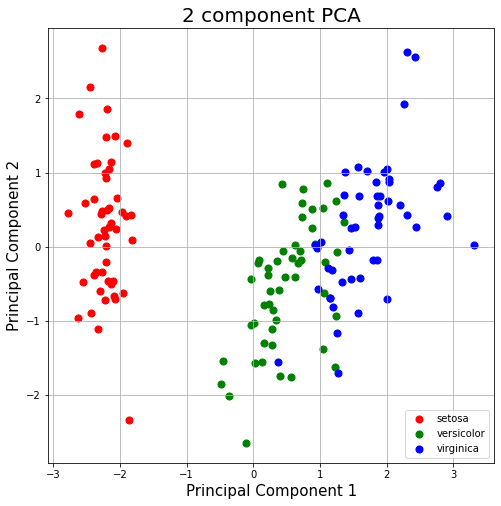

In [10]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df['target'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'PC 1'], 
               principalDf.loc[indicesToKeep, 'PC 2'], c=color, s=50)
ax.legend(targets)
ax.grid()

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, df['target'], 
                                                    test_size=0.33, random_state=101)

model = GradientBoostingClassifier(n_estimators=100, max_depth=15, learning_rate=0.1, 
                                   verbose=1)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

      Iter       Train Loss   Remaining Time 
         1          90.2076            0.39s
         2          75.5453            0.38s
         3          63.8407            0.38s
         4          54.3031            0.38s
         5          46.4194            0.35s
         6          39.8339            0.40s
         7          34.2884            0.39s
         8          29.5891            0.39s
         9          25.5868            0.38s
        10          22.1640            0.36s
        20           5.5569            0.26s
        30           1.4466            0.20s
        40           0.3801            0.16s
        50           0.1010            0.13s
        60           0.0402            0.10s
        70           0.0402            0.07s
        80           0.0402            0.04s
        90           0.0402            0.02s
       100           0.0402            0.00s


In [12]:
from sklearn.metrics import confusion_matrix, classification_report

print('Confusion matrix: \n', confusion_matrix(y_test, prediction))
print('\n')
print('Classification report: \n', classification_report(y_test, prediction))

Confusion matrix: 
 [[15  0  0]
 [ 0 21  1]
 [ 0  1 12]]


Classification report: 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.95      0.95      0.95        22
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [13]:
from sklearn.preprocessing import label_binarize

def convert_back(x):
    if x == 'setosa':
        x = 0
    elif x == 'versicolor':
        x = 1
    else:
        x = 2
    return x

y_test = y_test.apply(convert_back)
y_test = label_binarize(y_test, classes=[0,1,2])
probs = model.predict_proba(X_test)
print(probs.shape)
print(y_test.shape)

(50, 3)
(50, 3)


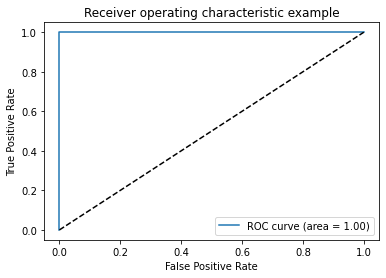

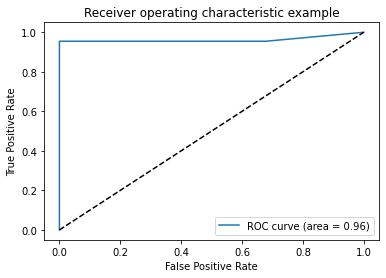

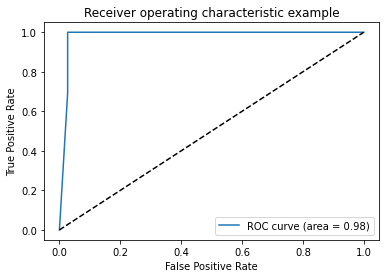

In [15]:
from sklearn.metrics import roc_curve, auc

n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()